In [224]:
!pip install scikit-learn

In [249]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
import seaborn as sns
import matplotlib.pyplot as plt

## Loading Data

In [226]:
df = pd.read_csv('vehicles.csv')
df.head(8)

Age  Gender  Income Favorite Transport
0    5  female     NaN            bicycle
1    8    male     NaN            scooter
2   10  female     NaN            bicycle
3   14    male     NaN              metro
4   16    male     NaN              metro
5   18  female     NaN              metro
6   20    male   200.0            scooter
7   22  female   500.0            scooter

In [227]:
df.dtypes

Age                     int64
Gender                 object
Income                float64
Favorite Transport     object
dtype: object

## Cleaning

In [228]:
df.isnull().sum()

Age                   0
Gender                0
Income                6
Favorite Transport    0
dtype: int64

In [229]:
df['Income'].fillna(0.0, inplace=True)
df.head(8)

Age  Gender  Income Favorite Transport
0    5  female     0.0            bicycle
1    8    male     0.0            scooter
2   10  female     0.0            bicycle
3   14    male     0.0              metro
4   16    male     0.0              metro
5   18  female     0.0              metro
6   20    male   200.0            scooter
7   22  female   500.0            scooter

In [230]:
df.isnull().sum()

Age                   0
Gender                0
Income                0
Favorite Transport    0
dtype: int64

## Encoding

In [231]:
df['Gender'].unique()

array(['female', 'male'], dtype=object)

In [232]:
# # OPTION 1
# df.replace({
#     'Gender': {
#         'male': 0,
#         'female': 1
#     }
# }, inplace=True)
# df.head()

In [233]:
# OPTION 2
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df.head(8)

Age  Gender  Income Favorite Transport
0    5       0     0.0            bicycle
1    8       1     0.0            scooter
2   10       0     0.0            bicycle
3   14       1     0.0              metro
4   16       1     0.0              metro
5   18       0     0.0              metro
6   20       1   200.0            scooter
7   22       0   500.0            scooter

In [234]:
df.dtypes

Age                     int64
Gender                  int64
Income                float64
Favorite Transport     object
dtype: object

## Model

In [235]:
X = df.drop(columns='Favorite Transport')
X.head(3)

Age  Gender  Income
0    5       0     0.0
1    8       1     0.0
2   10       0     0.0

In [236]:
y = df['Favorite Transport']
y.head(3)

0    bicycle
1    scooter
2    bicycle
Name: Favorite Transport, dtype: object

In [237]:
model = DecisionTreeClassifier()
model

DecisionTreeClassifier()

In [238]:
model.fit(X, y)

DecisionTreeClassifier()

## Prediction

In [239]:
test_df = pd.DataFrame({
    'Age': [12, 30, 75],
    'Gender': [0, 0, 1],
    'Income': [0.0, 4000, 50000]
})
test_df

Age  Gender   Income
0   12       0      0.0
1   30       0   4000.0
2   75       1  50000.0

In [240]:
model.predict(test_df)

array(['bicycle', 'car', 'helicopter'], dtype=object)

## Exporting to the DOT file

In [241]:
tree.export_graphviz(model, out_file='decision_tree_model.dot', feature_names=['Age', 'Gender', 'Income'], filled=True, class_names=sorted(y.unique()))

## Evaluation

In [242]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X.shape

(26, 3)

In [243]:
X_train.shape

(20, 3)

In [244]:
X_test.shape

(6, 3)

In [245]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [246]:
X_test

Age  Gender  Income
14   45       1  3000.0
9    25       0   800.0
15   47       0  6000.0
0     5       0     0.0
18   56       0  1400.0
4    16       1     0.0

In [247]:
predictions = model.predict(X_test)
predictions

array(['car', 'scooter', 'car', 'scooter', 'taxi', 'metro'], dtype=object)

In [248]:
model_accuracy_score = accuracy_score(y_test, predictions)
model_accuracy_score

0.5

## Charts

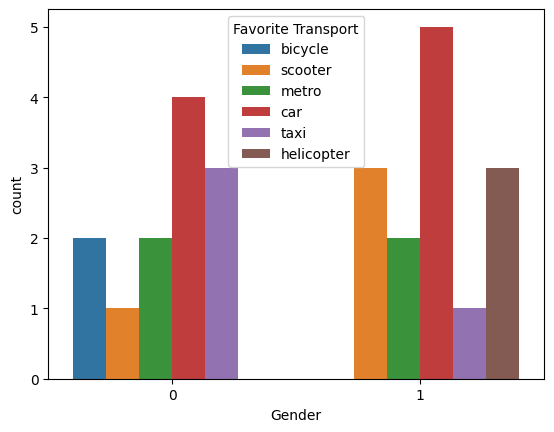

In [250]:
sns.countplot(x=df['Gender'], hue=df['Favorite Transport'])
plt.show()

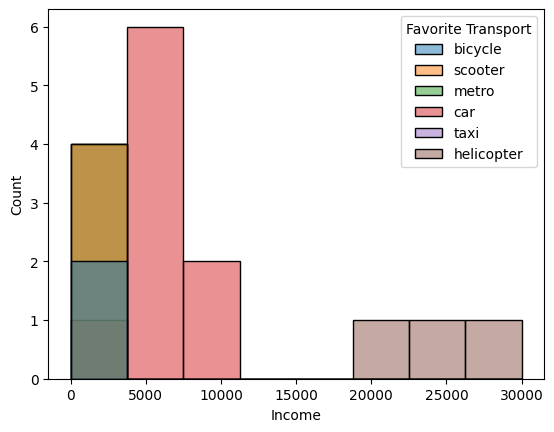

In [251]:
sns.histplot(x=df['Income'], hue=df['Favorite Transport'])
plt.show()